## human lymph

In [3]:
import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns
import torch
from sklearn.utils import shuffle
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',  # 设置字体类型
    "font.size":22,
    "axes.unicode_minus": False #解决负号无法显示的问题
}
rcParams.update(config)

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
from sklearn.utils import shuffle
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt
def cosine_similarity(vec1, vec2):
    """
    计算两个向量之间的余弦相似度
    :param vec1: 第一个向量
    :param vec2: 第二个向量
    :return: 余弦相似度
    """
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)


def clr_normalize_each_cell(adata, inplace=True):
    
    """Normalize count vector for each cell, i.e. for each row of .X"""

    import numpy as np
    import scipy

    def seurat_clr(x):
        # TODO: support sparseness
        s = np.sum(np.log1p(x[x > 0]))
        exp = np.exp(s / len(x))
        return np.log1p(x / exp)
    
    # apply to dense or sparse matrix, along axis. returns dense matrix
    adata = np.apply_along_axis(
        seurat_clr, 1, adata
    )
    return adata 

file_fold = '/data/xiangdw/data/pred result/'
total_corr_sage = []
total_mse_sage = []
for i in range(5):
    y_truth = pd.read_csv(file_fold + 'SpaMIE pred result/' + str(i + 1) + 'humanlymph_SPaMIE_new_res3_wt_truth.csv',
                          header=0).to_numpy()
    y_pred = pd.read_csv(file_fold + 'SpaMIE pred result/' + str(i + 1) + 'humanlymph_SpaMIE_new_res3_wt_pred.csv',
                         header=0).to_numpy()
    mse_sage = np.sqrt(np.mean(np.square(y_truth - y_pred), axis=0))
    corr_sage = []
    for col1, col2 in zip(y_pred.T, y_truth.T):
        corr,_ = pearsonr(col1, col2)
        corr_sage.append(corr)
    total_corr_sage.append(corr_sage)
    total_mse_sage.append(mse_sage)

mse_sage = np.mean(np.array(total_mse_sage), axis=0)
corr_sage = np.mean(np.array(total_corr_sage), axis=0)


# scmogcn mse
total_corr = []
total_mse = []
for i in range(5):
    y_truth = pd.read_csv(file_fold + 'scmogcn pred result/' + str(i + 1) + 'humanlymph_RNA_scmogcn_truth.csv',
                          header=0).to_numpy()
    y_pred = pd.read_csv(file_fold + 'scmogcn pred result/' + str(i + 1) + 'humanlymph_RNA_scmogcn_pred.csv',
                         header=0).to_numpy()
    mse_scmogcn = np.sqrt(np.mean(np.square(y_truth - y_pred), axis=0))
    corr_scmogcn = []
    for col1, col2 in zip(y_pred.T, y_truth.T):
        corr,_ = pearsonr(col1, col2)
        corr_scmogcn.append(corr)
    total_corr.append(corr_scmogcn)
    total_mse.append(mse_scmogcn)

mse_scmogcn = np.mean(np.array(total_mse), axis=0)
corr_scmogcn = np.mean(np.array(total_corr), axis=0)

#scjoint mse
total_corr = []
total_mse = []
for i in range(5):
    y_truth = pd.read_csv(file_fold + 'scjoint pred result/' + str(i + 1) + 'humanlymph_RNA_scjoint_truth.csv',
                          header=0).to_numpy()
    y_pred = pd.read_csv(file_fold + 'scjoint pred result/' + str(i + 1) + 'humanlymph_RNA_scjoint_pred.csv',
                         header=0).to_numpy()
    mse_scjoint = np.sqrt(np.mean(np.square(y_truth - y_pred), axis=0))
    corr_scjoint = []
    for col1, col2 in zip(y_pred.T, y_truth.T):
        corr,_ = pearsonr(col1, col2)
        corr_scjoint.append(corr)
    total_corr.append(corr_scjoint)
    total_mse.append(mse_scjoint)

mse_scjoint = np.mean(np.array(total_mse), axis=0)
corr_scjoint = np.mean(np.array(total_corr), axis=0)

#JAMIE
total_corr = []
total_mse = []
for i in range(5):
    y_truth = pd.read_csv(file_fold + 'jamie pred result/' + str(i + 1) + 'humanlymph_RNA_jamie_truth.csv',
                          header=0).to_numpy()
    y_pred = pd.read_csv(file_fold + 'jamie pred result/' + str(i + 1) + 'humanlymph_RNA_jamie_pred.csv',
                         header=0).to_numpy()
    mse_jamie = np.sqrt(np.mean(np.square(y_truth - y_pred), axis=0))
    corr_jamie = []
    for col1, col2 in zip(y_pred.T, y_truth.T):
        corr,_ = pearsonr(col1, col2)
        corr_jamie.append(corr)
    total_corr.append(corr_jamie)
    total_mse.append(mse_jamie)

mse_jamie = np.mean(np.array(total_mse), axis=0)
corr_jamie = np.mean(np.array(total_corr), axis=0)

#SpaMosaic
total_corr = []
total_mse = []
for i in range(5):
    y_truth = pd.read_csv(file_fold + 'spamosaic pred result/' + str(i + 1) + 'humanlymph_RNA_truth.csv',
                          header=0).to_numpy()
    y_pred = pd.read_csv(file_fold + 'spamosaic pred result/' + str(i + 1) + 'humanlymph_RNA_pred.csv',
                         header=0).to_numpy()
    mse_SpaMosaic = np.sqrt(np.mean(np.square(y_truth - y_pred), axis=0))
    corr_SpaMosaic = []
    for col1, col2 in zip(y_pred.T, y_truth.T):
        corr,_ = pearsonr(col1, col2)
        corr_SpaMosaic.append(corr)
    total_corr.append(corr_SpaMosaic)
    total_mse.append(mse_SpaMosaic)

mse_SpaMosaic = np.mean(np.array(total_mse), axis=0)
corr_SpaMosaic = np.mean(np.array(total_corr), axis=0)


### MIDAS
total_corr = []
total_mse = []
for i in range(1):
    y_truth = pd.read_csv(file_fold + 'MIDAS pred result/' + str(i + 1) + '_MIDAS_humanlymph_truth.csv',
                          header=0).to_numpy()
    y_pred = pd.read_csv(file_fold + 'MIDAS pred result/' + str(i + 1) + '_MIDAS_humanlymph_pred.csv',
                         header=0).to_numpy()
    mse_MIDAS = np.sqrt(np.mean(np.square(y_truth - y_pred), axis=0))
    corr_MIDAS = []
    for col1, col2 in zip(y_pred.T, y_truth.T):
        corr,_ = pearsonr(col1, col2)
        corr_MIDAS.append(corr)
    total_corr.append(corr_MIDAS)
    total_mse.append(mse_MIDAS)

mse_MIDAS = np.mean(np.array(total_mse), axis=0)
corr_MIDAS = np.mean(np.array(total_corr), axis=0)


#StabMap
path = '/data/xiangdw/data/R_humanlymph/R_humanlymph/'
total_corr = []
total_mse = []
for i in range(5):
    y_pred = pd.read_csv('/data/xiangdw/data/R_humanlymph/R_humanlymph/'+ str(i+1)+'_humanlymph_stabmap_pred.csv',
                            index_col=0).T
    test_idx = pd.read_csv(path + str(i+1) + '_humanlymph_test_idx.csv', header=None).values.flatten().astype(int)
    adata = sc.read_h5ad('/data/xiangdw/data/R_humanlymph/R_humanlymph/adata_ADT_humanlymph.h5ad')
    test_names = y_pred.index
    y_truth = adata[test_names]
    y_pred = y_pred.to_numpy()[:,1:]
    y_truth = y_truth.X
    y_pred = clr_normalize_each_cell(y_pred)
    y_truth = clr_normalize_each_cell(y_truth)
    mse_StabMap = np.sqrt(np.mean(np.square(y_truth - y_pred), axis=0))
    corr_StabMap = []
    for col1, col2 in zip(y_pred.T, y_truth.T):
        corr,_ = pearsonr(col1, col2)
        corr_StabMap.append(corr)
    total_corr.append(corr_StabMap)
    total_mse.append(mse_StabMap)

mse_StabMap = np.mean(np.array(total_mse), axis=0)
corr_StabMap = np.mean(np.array(total_corr), axis=0)


/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/scipy/stats/_stats_

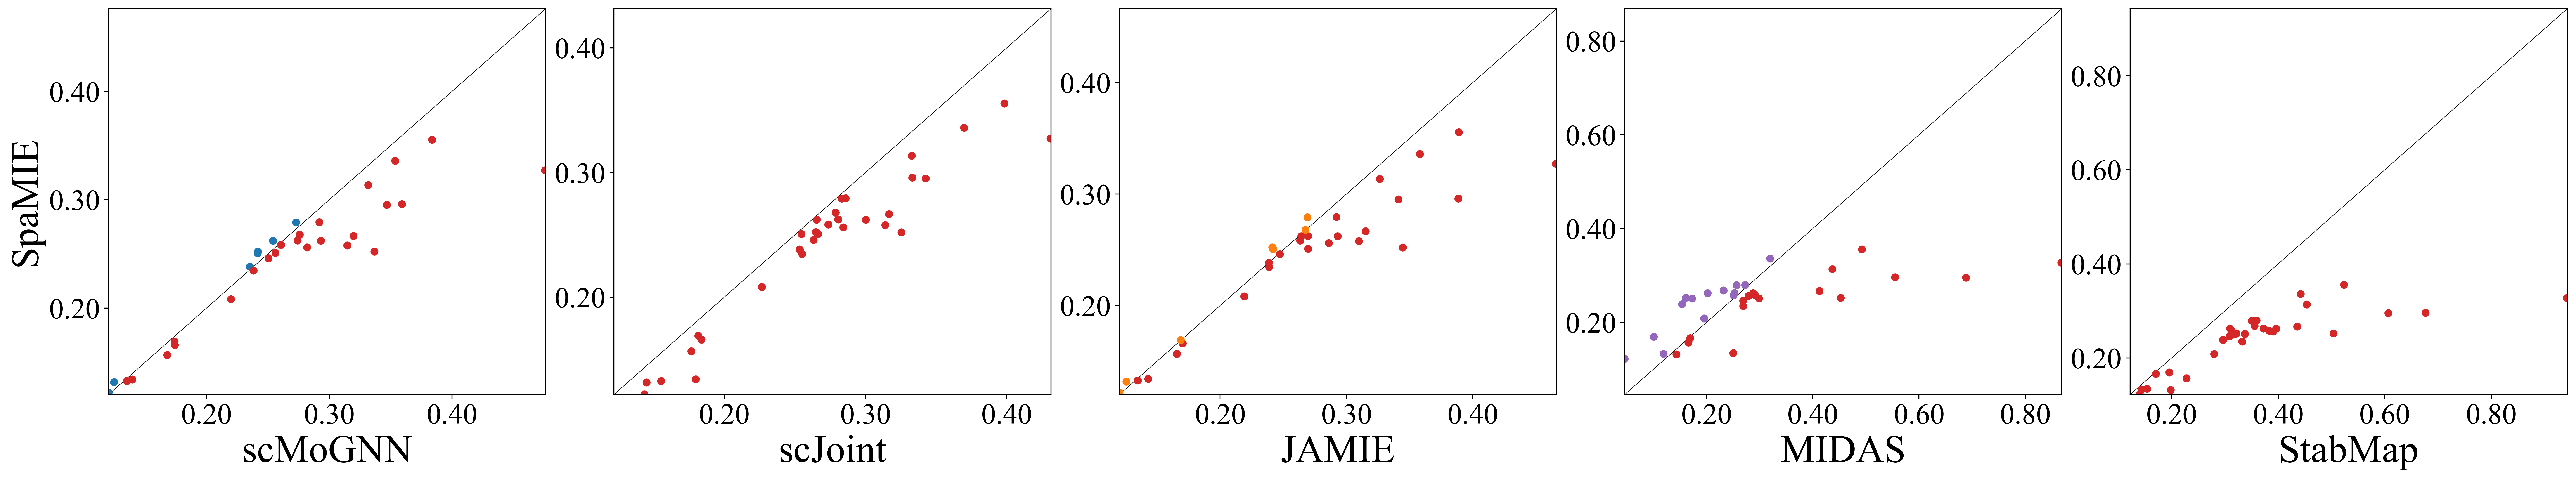

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

plt.rcParams['figure.figsize'] = (30, 6)
plt.rcParams['font.size'] = 24
fig, ax = plt.subplots(1, 5,dpi=400)

def get_colors(x_data, y_data, color='#1f77b4'):
    """根据y值与45度线关系生成颜色数组"""
    colors = []
    for x, y in zip(x_data, y_data):
        if y < x:  # 45度线下方（红）
            colors.append('#d62728')
        else:       # 45度线上方（蓝）
            colors.append(color)
    return colors

def setup_axis(ax, x_data, y_data, label, color):
    """统一设置坐标轴参数"""
    # 绘制散点
    colors = get_colors(x_data, y_data, color=color)
    ax.scatter(x_data, y_data, color=colors, s=30)
    
    # 计算坐标轴范围
    all_values = np.concatenate([x_data, y_data])
    axis_min = np.nanmin(all_values)*0.999
    axis_max = np.nanmax(all_values)*1.001
    
    # 绘制45度基准线
    ax.axline((0.4, 0.4), slope=1, color='k', linewidth=0.5, zorder=0)
    
    # 设置坐标轴范围和格式
    ax.set_xlim(axis_min, axis_max)
    ax.set_ylim(axis_min, axis_max)
    ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
    
    # 添加标签
    ax.set_xlabel(label, fontsize=32)

# 绘制各子图
# setup_axis(ax[0], mse_SpaMosaic, mse_sage, 'SpaMosaic')
setup_axis(ax[0], mse_scmogcn, mse_sage, 'scMoGNN',color='#1f77b4')
setup_axis(ax[1], mse_scjoint, mse_sage, 'scJoint',color='#2ca02c')
setup_axis(ax[2], mse_jamie, mse_sage, 'JAMIE',color='#ff7f0e')
setup_axis(ax[3], mse_MIDAS, mse_sage, 'MIDAS',color='#9467bd')
setup_axis(ax[4], mse_StabMap, mse_sage, 'StabMap',color='#c8bd25')
# 添加统一标签
ax[0].set_ylabel('SpaMIE', fontsize=32)

plt.tight_layout(w_pad=0.3)
plt.show()

comparisons = [
    # (mse_SpaMosaic, mse_sage, ax[0]),# SpaMosaic vs SpaMIE
    (mse_scmogcn, mse_sage, ax[0]),  # scMoGNN vs SpaMIE
    (mse_scjoint, mse_sage, ax[1]),  # scJoint vs SpaMIE
    (mse_jamie, mse_sage, ax[2]),  # JAMIE vs SpaMIE
    (mse_MIDAS, mse_sage, ax[3]),  # MIDAS vs SpaMIE
    (mse_StabMap, mse_sage, ax[4])  # St
]    



In [9]:
corr_jamie = {'JAMIE': list(corr_jamie)}
corr_SpaMosaic = {'SpaMosaic': list(corr_SpaMosaic)}
corr_scmogcn = {'scMoGNN': list(corr_scmogcn)}
corr_scjoint = {'scJoint': list(corr_scjoint)}
corr_sage = {'SpaMIE': list(corr_sage)}
corr_MIDAS = {'MIDAS': list(corr_MIDAS)}
corr_StabMap = {'StabMap': list(corr_StabMap)}

In [10]:
d = {}
d = { **corr_sage , **corr_scmogcn,**corr_scjoint, **corr_jamie, **corr_MIDAS, **corr_StabMap} 

d =pd.DataFrame(d, index=['CD163', 'CR2', 'PCNA', 'VIM', 'KRT5', 'CD68', 'CEACAM8', 'PTPRC',
       'HLA-DRA', 'PAX5', 'SDC1', 'PTPRC-1', 'CD8A', 'BCL2', 'CD19', 'PDCD1',
       'ACTA2', 'FCGR3A', 'ITGAX', 'CXCR5', 'EPCAM', 'MS4A1', 'CD3E', 'CD14',
       'CD40', 'PECAM1', 'CD4', 'ITGAM', 'CD27', 'CCR7', 'CD274'])


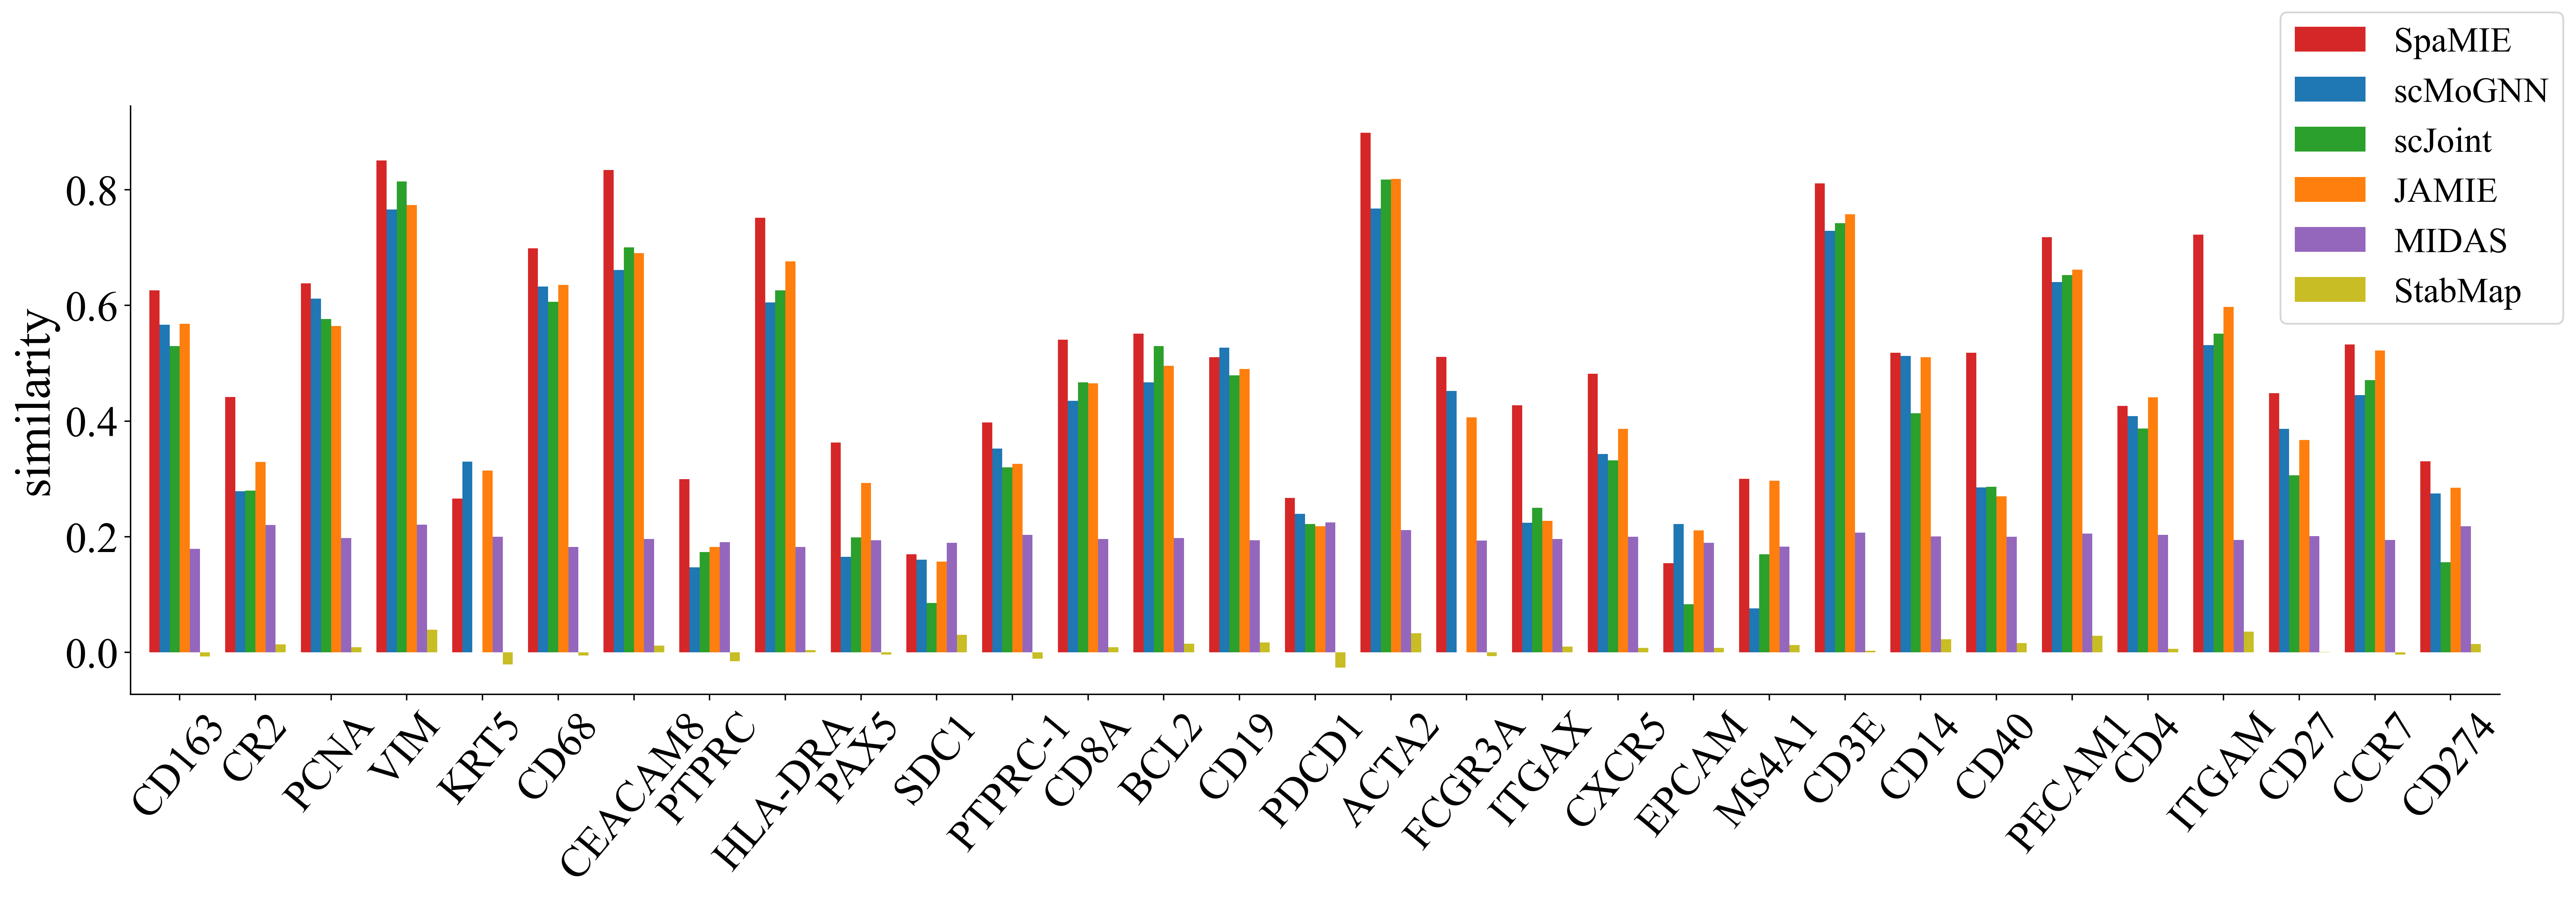

In [11]:
res_stack = d.T.stack().reset_index()
res_stack
res_stack.columns=['Method', 'ADT_name', 'value']
res_stack.set_index('Method')
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(dpi=400, figsize=(24, 6))  # 建议添加figsize控制图片尺寸

# ax = sns.boxplot(data=res_stack, x='Method', y='value', linewidth=0.5, showfliers=False)
colors = ['#d62728', '#1f77b4','#2ca02c' ,'#ff7f0e',  '#9467bd' ,"#c8bd25"]
d.plot(kind='bar', width=0.8, color=colors,ax=ax)
plt.legend( bbox_to_anchor=(0.9, 0.6), fontsize=20)
plt.xticks(rotation=50)
plt.ylabel('similarity',fontsize=28)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [15]:
from sklearn.metrics import (adjusted_rand_score, normalized_mutual_info_score, adjusted_mutual_info_score, 
                             mutual_info_score, homogeneity_score, homogeneity_completeness_v_measure)


def ARI_metric(labels_true, labels_pred): 
 ari = adjusted_rand_score(labels_true, labels_pred)  
 return ari


def NMI_metric(labels_true, labels_pred): 
 NMI = normalized_mutual_info_score(labels_true, labels_pred)  
 return NMI

def AMI_metric(labels_true, labels_pred): 
 AMI = adjusted_mutual_info_score(labels_true, labels_pred)  
 return AMI

def MIS_metric(labels_true, labels_pred): 
 MIS = mutual_info_score(labels_true, labels_pred)  
 return MIS

def HS_metric(labels_true, labels_pred): 
 HS = homogeneity_score(labels_true, labels_pred)  
 return HS

def VM_metric(labels_true, labels_pred): 
 VM = homogeneity_completeness_v_measure(labels_true, labels_pred)  
 return VM


In [26]:
adata1

AnnData object with n_obs × n_vars = 2613 × 18085
    obs: 'Truth', 'SpatialGlue', 'SpaMIE', 'Mefisto', 'COSMOS', 'SpaVAE', 'SpaVAE_5', 'SpaVAE_7', 'SpaVAE_8', 'SpaVAE_9', 'SpaVAE_10', 'SpaVAE_11', 'COSMOS_11', 'COSMOS_10', 'COSMOS_9', 'COSMOS_8', 'COSMOS_7', 'COSMOS_5', 'SpaMIE_5', 'SpaMIE_7', 'SpaMIE_8', 'SpaMIE_9', 'SpaMIE_10', 'SpaMIE_11', 'SpatialGlue_11', 'SpatialGlue_10', 'SpatialGlue_9', 'SpatialGlue_8', 'SpatialGlue_7', 'SpatialGlue_5', 'Mefisto_5', 'Mefisto_7', 'Mefisto_8', 'Mefisto_9', 'Mefisto_10', 'Mefisto_11', 'SpaMIE2', 'SpaMIE4', 'new_SpaMIE_sage', 'new_SpaMIE_liner', 'new_SpaMIE_sage_5', 'new_SpaMIE_sage_11', 'new_SpaMIE_sage_10', 'new_SpaMIE_sage_9', 'new_SpaMIE_sage_8', 'new_SpaMIE_sage_7', 'SpaMIE_pred_1', 'SpaMIE_pred_2', 'SpaMIE_pred_3', 'SpatialGlue_pred_1', 'SpatialGlue_pred_2', 'SpatialGlue_pred_3', 'SpatialGlue_pred_4', 'SpatialGlue_pred_5', 'SpaMIE_pred_4', 'SpaMIE_pred_5', 'COSMOS_pred_1', 'COSMOS_pred_2', 'COSMOS_pred_3', 'COSMOS_pred_4', 'COSMOS_pred_5', '

In [27]:
import pandas as pd
path =  '/data/xiangdw/data/data/humanlymph/' 


def calculate_metrics (adata, domain, target_key):
    metrics = []
    metrics.append(ARI_metric(adata.obs[domain], adata.obs[target_key]))
    metrics.append(NMI_metric(adata.obs[domain], adata.obs[target_key]))
    metrics.append(AMI_metric(adata.obs[domain], adata.obs[target_key]))
    metrics.append(MIS_metric(adata.obs[domain], adata.obs[target_key]))
    metrics.append(HS_metric(adata.obs[domain], adata.obs[target_key]))
    return metrics

metric_all = pd.DataFrame()

for i in range(5):
    seedss = str(i+1) 
    adata1 = sc.read_h5ad(path + 'Humanlymph_methods_test_'+ seedss +'.h5ad')
    SpaMIE_metric = {}
    metric_3_1 = {}
    i = '_'+seedss




    # 对每种方法计算指标并存储在相应的字典中
    for method in ('SpaMIE_pred'+i, 'Louvain_feat'+seedss):
        metrics_list = calculate_metrics(adata1, 'Truth', method)
        if method == 'SpaMIE_pred'+i:
            SpaMIE_metric['Integration'] = metrics_list
        elif method == 'Louvain_feat'+seedss:
            metric_3_1['Separation'] = metrics_list
        

    
    metric = {"Metric":['ARI','NMI','AMI','MIS','HS']}
    d = {}
    d = {**SpaMIE_metric, **metric_3_1} 
    d =pd.DataFrame(d,index=['ARI','NMI','AMI','MIS','HS'])
    metric_all = pd.concat([metric_all, d], axis=0)

metric_all


import pandas as pd

res_all_stack = metric_all.stack().reset_index()
res_all_stack.columns=['Method', 'Metric', 'value']
res_all_stack.set_index('Method')

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,4)
plt.rcParams['font.size'] = 20
plt.rcParams['font.sans-serif'] = 'Arial'
res_all_stack



/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observati

Method       Metric     value
0     ARI  Integration  0.294627
1     ARI   Separation  0.289841
2     NMI  Integration  0.391370
3     NMI   Separation  0.351467
4     AMI  Integration  0.388111
5     AMI   Separation  0.348026
6     MIS  Integration  0.660712
7     MIS   Separation  0.599332
8      HS  Integration  0.387288
9      HS   Separation  0.351309
10    ARI  Integration  0.261860
11    ARI   Separation  0.328184
12    NMI  Integration  0.382178
13    NMI   Separation  0.362200
14    AMI  Integration  0.378832
15    AMI   Separation  0.358695
16    MIS  Integration  0.639873
17    MIS   Separation  0.598395
18     HS  Integration  0.382561
19     HS   Separation  0.357763
20    ARI  Integration  0.294436
21    ARI   Separation  0.326320
22    NMI  Integration  0.398420
23    NMI   Separation  0.365079
24    AMI  Integration  0.395164
25    AMI   Separation  0.361589
26    MIS  Integration  0.667236
27    MIS   Separation  0.601802
28     HS  Integration  0.396482
29     HS   Separation  0.357601
30    ARI  Integration  0.287575
31    ARI   Separation  0.230436
32    NMI  Integration  0.392257
33    NMI   Separation  0.306664
34    AMI  Integration  0.388954
35    AMI   Separation  0.303044
36    MIS  Integration  0.653535
37    MIS   Separation  0.494715
38     HS  Integration  0.386693
39     HS   Separation  0.292720
40    ARI  Integration  0.259889
41    ARI   Separation  0.292395
42    NMI  Integration  0.378923
43    NMI   Separation  0.346910
44    AMI  Integration  0.375600
45    AMI   Separation  0.343512
46    MIS  Integration  0.640505
47    MIS   Separation  0.560810
48     HS  Integration  0.378019
49     HS   Separation  0.330984

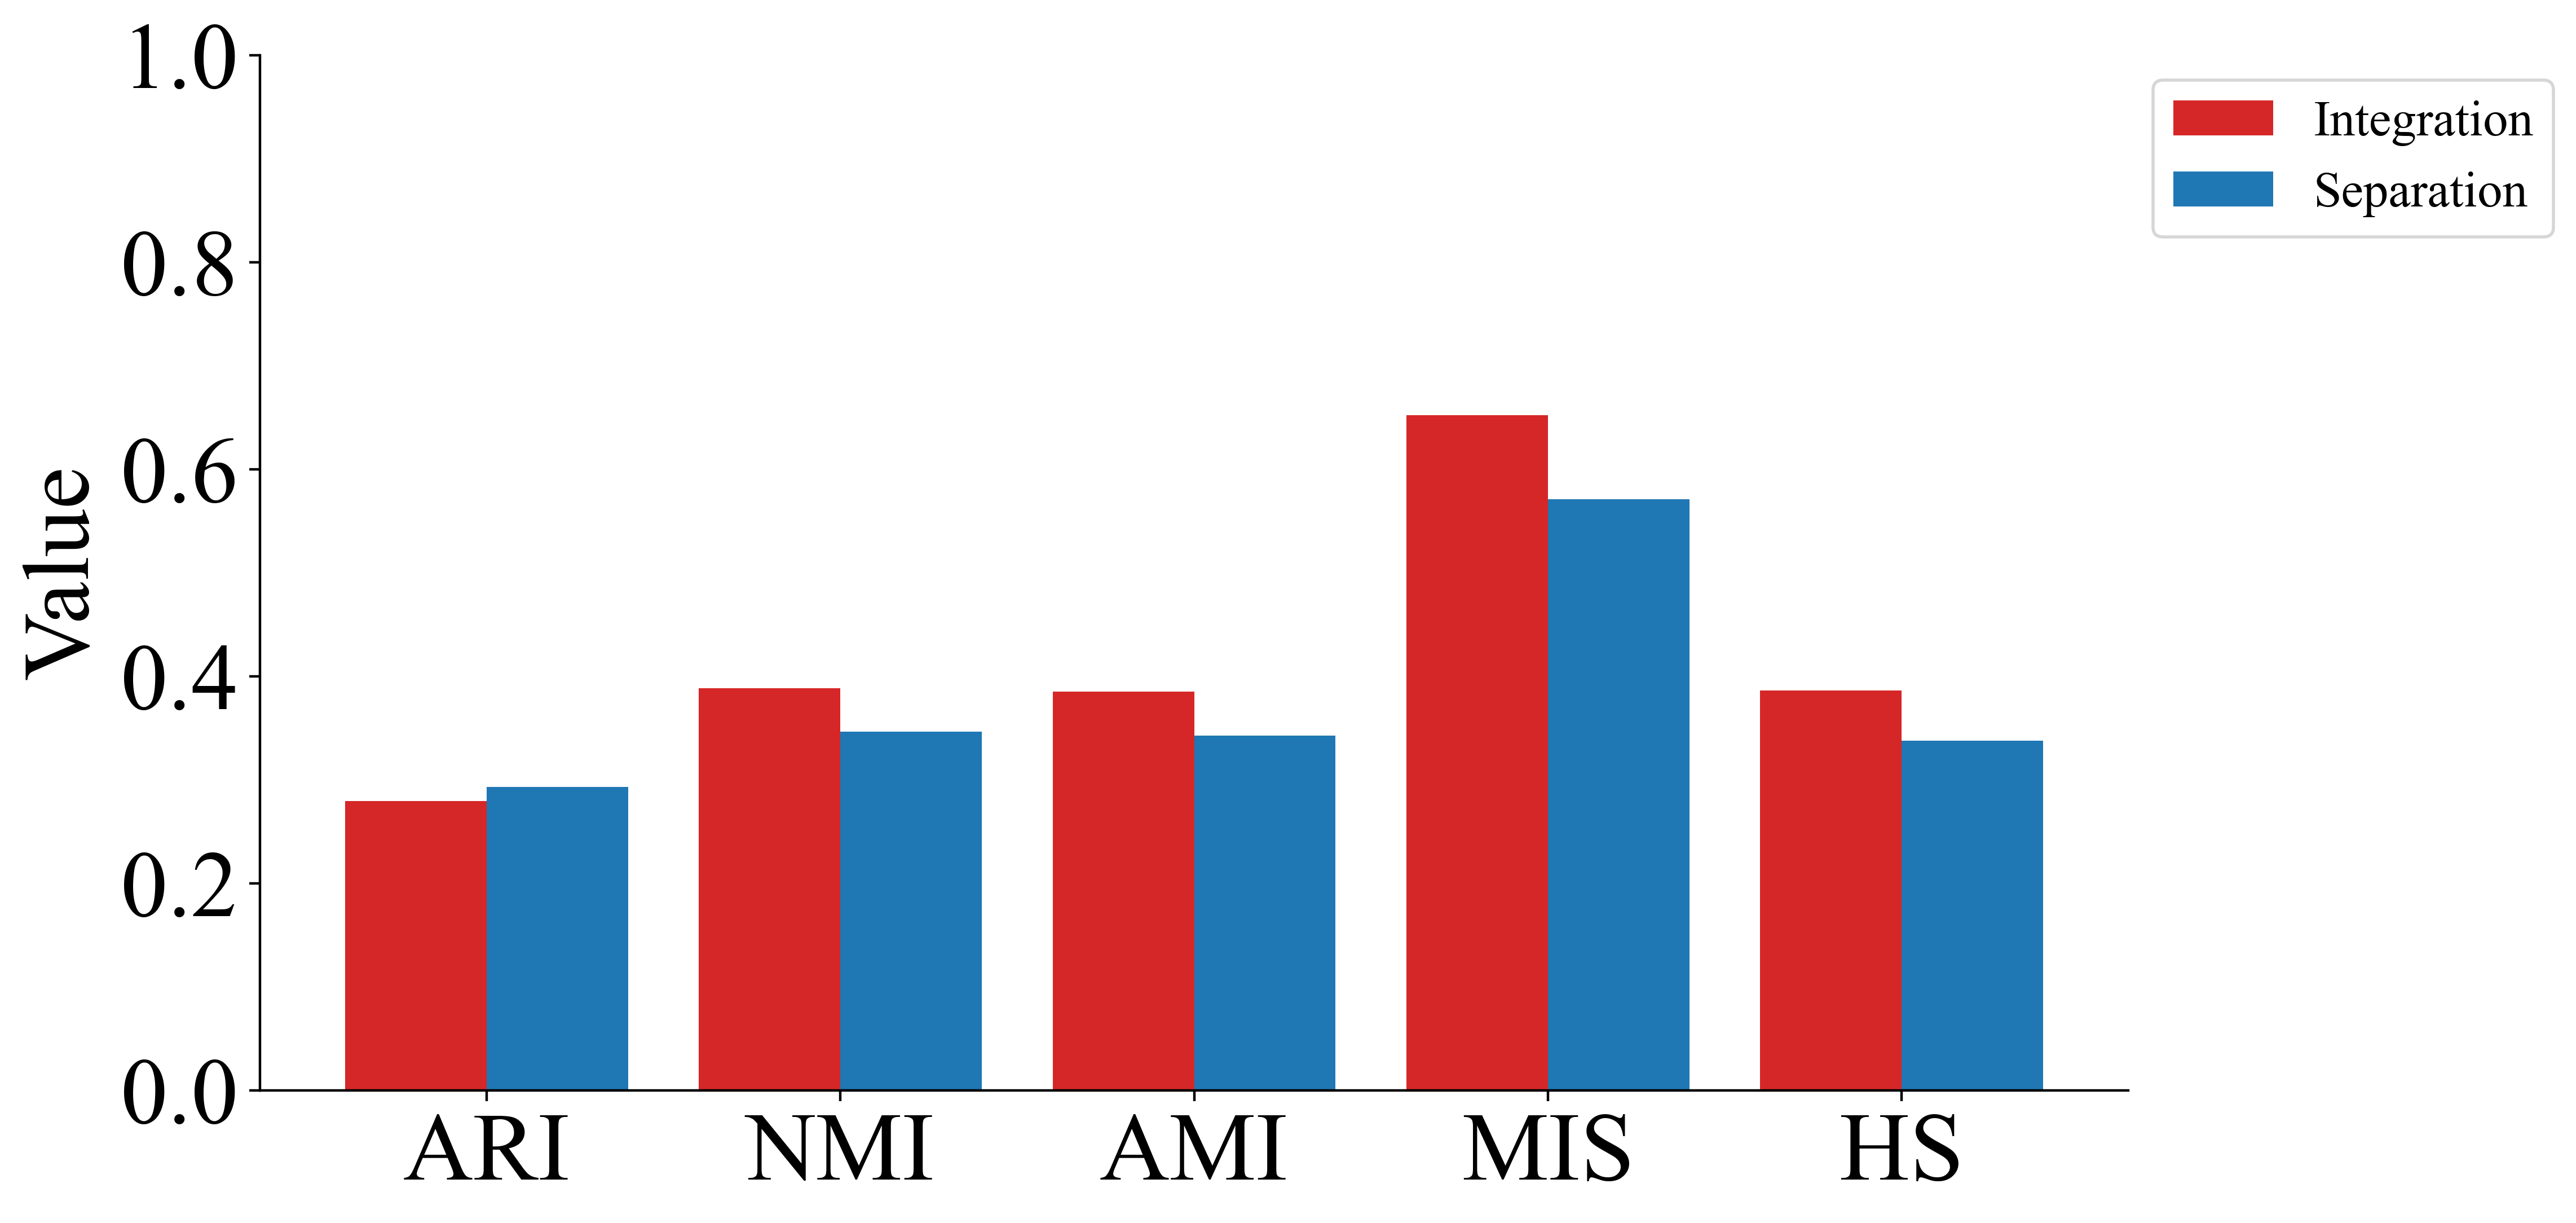

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({
    'font.size': 26,          
    'axes.titlesize': 30,    
    'axes.labelsize': 30,    
    'xtick.labelsize': 31,  
    'ytick.labelsize': 30,   
    'legend.fontsize': 16    
})
mean_data = res_all_stack.groupby(['Method', 'Metric'])['value'].mean().unstack()
std_data = res_all_stack.groupby(['Method', 'Metric'])['value'].std().unstack()

mean_data = mean_data[['Integration', 'Separation']]
std_data = std_data[[ 'Integration', 'Separation']]
mean_data = mean_data.reindex(['ARI','NMI','AMI','MIS','HS'])
std_data = std_data.reindex(['ARI','NMI','AMI','MIS','HS'])

palette = ['#d62728','#1f77b4'] 
n_methods = len(mean_data.index)
n_metrics = len(mean_data.columns)
bar_width = 0.8/n_metrics  

fig, ax = plt.subplots(figsize=(12, 6), dpi=400)

for i, metric in enumerate(mean_data.columns):
    x_pos = np.arange(n_methods) + i*bar_width
    ax.bar(
        x=x_pos,
        height=mean_data[metric],
        width=bar_width,
        error_kw={'elinewidth': 1, 'capsize': 3},
        label=metric,
        color=palette[i]
    )


ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))

ax.set_xticks(np.arange(n_methods) + bar_width*(n_metrics-1)/2)
ax.set_xticklabels(mean_data.index, rotation=45)
plt.xticks(rotation=0)
ax.set_xlabel('')
ax.set_ylabel('Value')
max_val = mean_data.max().max() + std_data.max().max()
ax.set_ylim(0, max(1.0, max_val * 1.15)) 

if max_val <= 0.5:
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
elif max_val <= 1.0:
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
else:
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.4))
max_val = mean_data.max().max() + std_data.max().max()

ax.legend(
    title='',
    loc='upper left',
    bbox_to_anchor=(1, 1),
    fontsize=16,
    frameon=True
)

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

In [29]:
import pandas as pd
path =  '/data/xiangdw/data/data/humanlymph/' 


def calculate_metrics (adata, domain, target_key):
    metrics = []
    metrics.append(ARI_metric(adata.obs[domain], adata.obs[target_key]))
    metrics.append(NMI_metric(adata.obs[domain], adata.obs[target_key]))
    metrics.append(AMI_metric(adata.obs[domain], adata.obs[target_key]))
    metrics.append(MIS_metric(adata.obs[domain], adata.obs[target_key]))
    metrics.append(HS_metric(adata.obs[domain], adata.obs[target_key]))
    return metrics

metric_all = pd.DataFrame()

for i in range(5): 
    adata1 = sc.read_h5ad(path + 'Humanlymph_methods.h5ad')
    SpaMIE_metric = {}
    SpatialGlue_metric = {}
    COSMOS_metric = {}
    SpaVAE_metric = {}
    Mefisto_metric = {}
    MISO_metric = {}
    JAMIE_metric = {}
    MIDAS_metric = {}
    StabMap_metric = {}
    SpaMosaic_metric = {}



    i = str(i+1)

    # 对每种方法计算指标并存储在相应的字典中
    for method in ('SpaMIE_pred_'+i,  'SpatialGlue_pred_'+i, 'COSMOS_pred_'+i, 'SpaVAE', 
                   'MEFISTO_pred_'+i, 'MISO_pred_'+i, 'MIDAS_pred_'+i, 'JAMIE_pred_'+i, 'SpaMosaic_pred_'+i,'StabMap_pred_'+i):
        metrics_list = calculate_metrics(adata1, 'Truth', method)
        if method == 'SpaMIE_pred_'+i:
            SpaMIE_metric['SpaMIE'] = metrics_list
        elif method == 'SpaVAE' :
            SpaVAE_metric['spaMultiVAE'] = metrics_list
        elif method == 'COSMOS_pred_'+i:
            COSMOS_metric['COSMOS'] = metrics_list
        elif method == 'SpatialGlue_pred_'+i:
            SpatialGlue_metric['SpatialGlue'] = metrics_list
        elif method == 'MEFISTO_pred_'+i:
            Mefisto_metric['MEFISTO'] = metrics_list
        elif method == 'MISO_pred_'+i:
            MISO_metric['MISO'] = metrics_list
        elif method == 'MIDAS_pred_'+i:
            MIDAS_metric['MIDAS'] = metrics_list
        elif method == 'StabMap_pred_'+i:
            StabMap_metric['StabMap'] = metrics_list
        elif method == 'JAMIE_pred_'+i:
            JAMIE_metric['JAMIE'] = metrics_list
        elif method == 'SpaMosaic_pred_'+i:
            SpaMosaic_metric['SpaMosaic'] = metrics_list                
        

    
    
    metric = {"Metric":['ARI','NMI','AMI','MIS','HS']}
    d = {}
    d = {**SpaMIE_metric, **SpatialGlue_metric,    **COSMOS_metric,**JAMIE_metric, **MIDAS_metric, **StabMap_metric, **SpaVAE_metric,
         **Mefisto_metric, **MISO_metric, } 
    d =pd.DataFrame(d,index=['ARI','NMI','AMI','MIS','HS'])
    metric_all = pd.concat([metric_all, d], axis=0)

metric_all


import pandas as pd

res_all_stack = metric_all.stack().reset_index()
res_all_stack.columns=['Method', 'Metric', 'value']
res_all_stack.set_index('Method')

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,4)
plt.rcParams['font.size'] = 20
plt.rcParams['font.sans-serif'] = 'Arial'
res_all_stack


/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names 

Method       Metric     value
0      ARI       SpaMIE  0.293388
1      ARI  SpatialGlue  0.243942
2      ARI       COSMOS  0.166756
3      ARI        JAMIE  0.226425
4      ARI        MIDAS  0.148370
..     ...          ...       ...
220     HS        MIDAS  0.227895
221     HS      StabMap  0.079828
222     HS  spaMultiVAE  0.325619
223     HS      MEFISTO  0.235810
224     HS         MISO  0.292700

[225 rows x 3 columns]

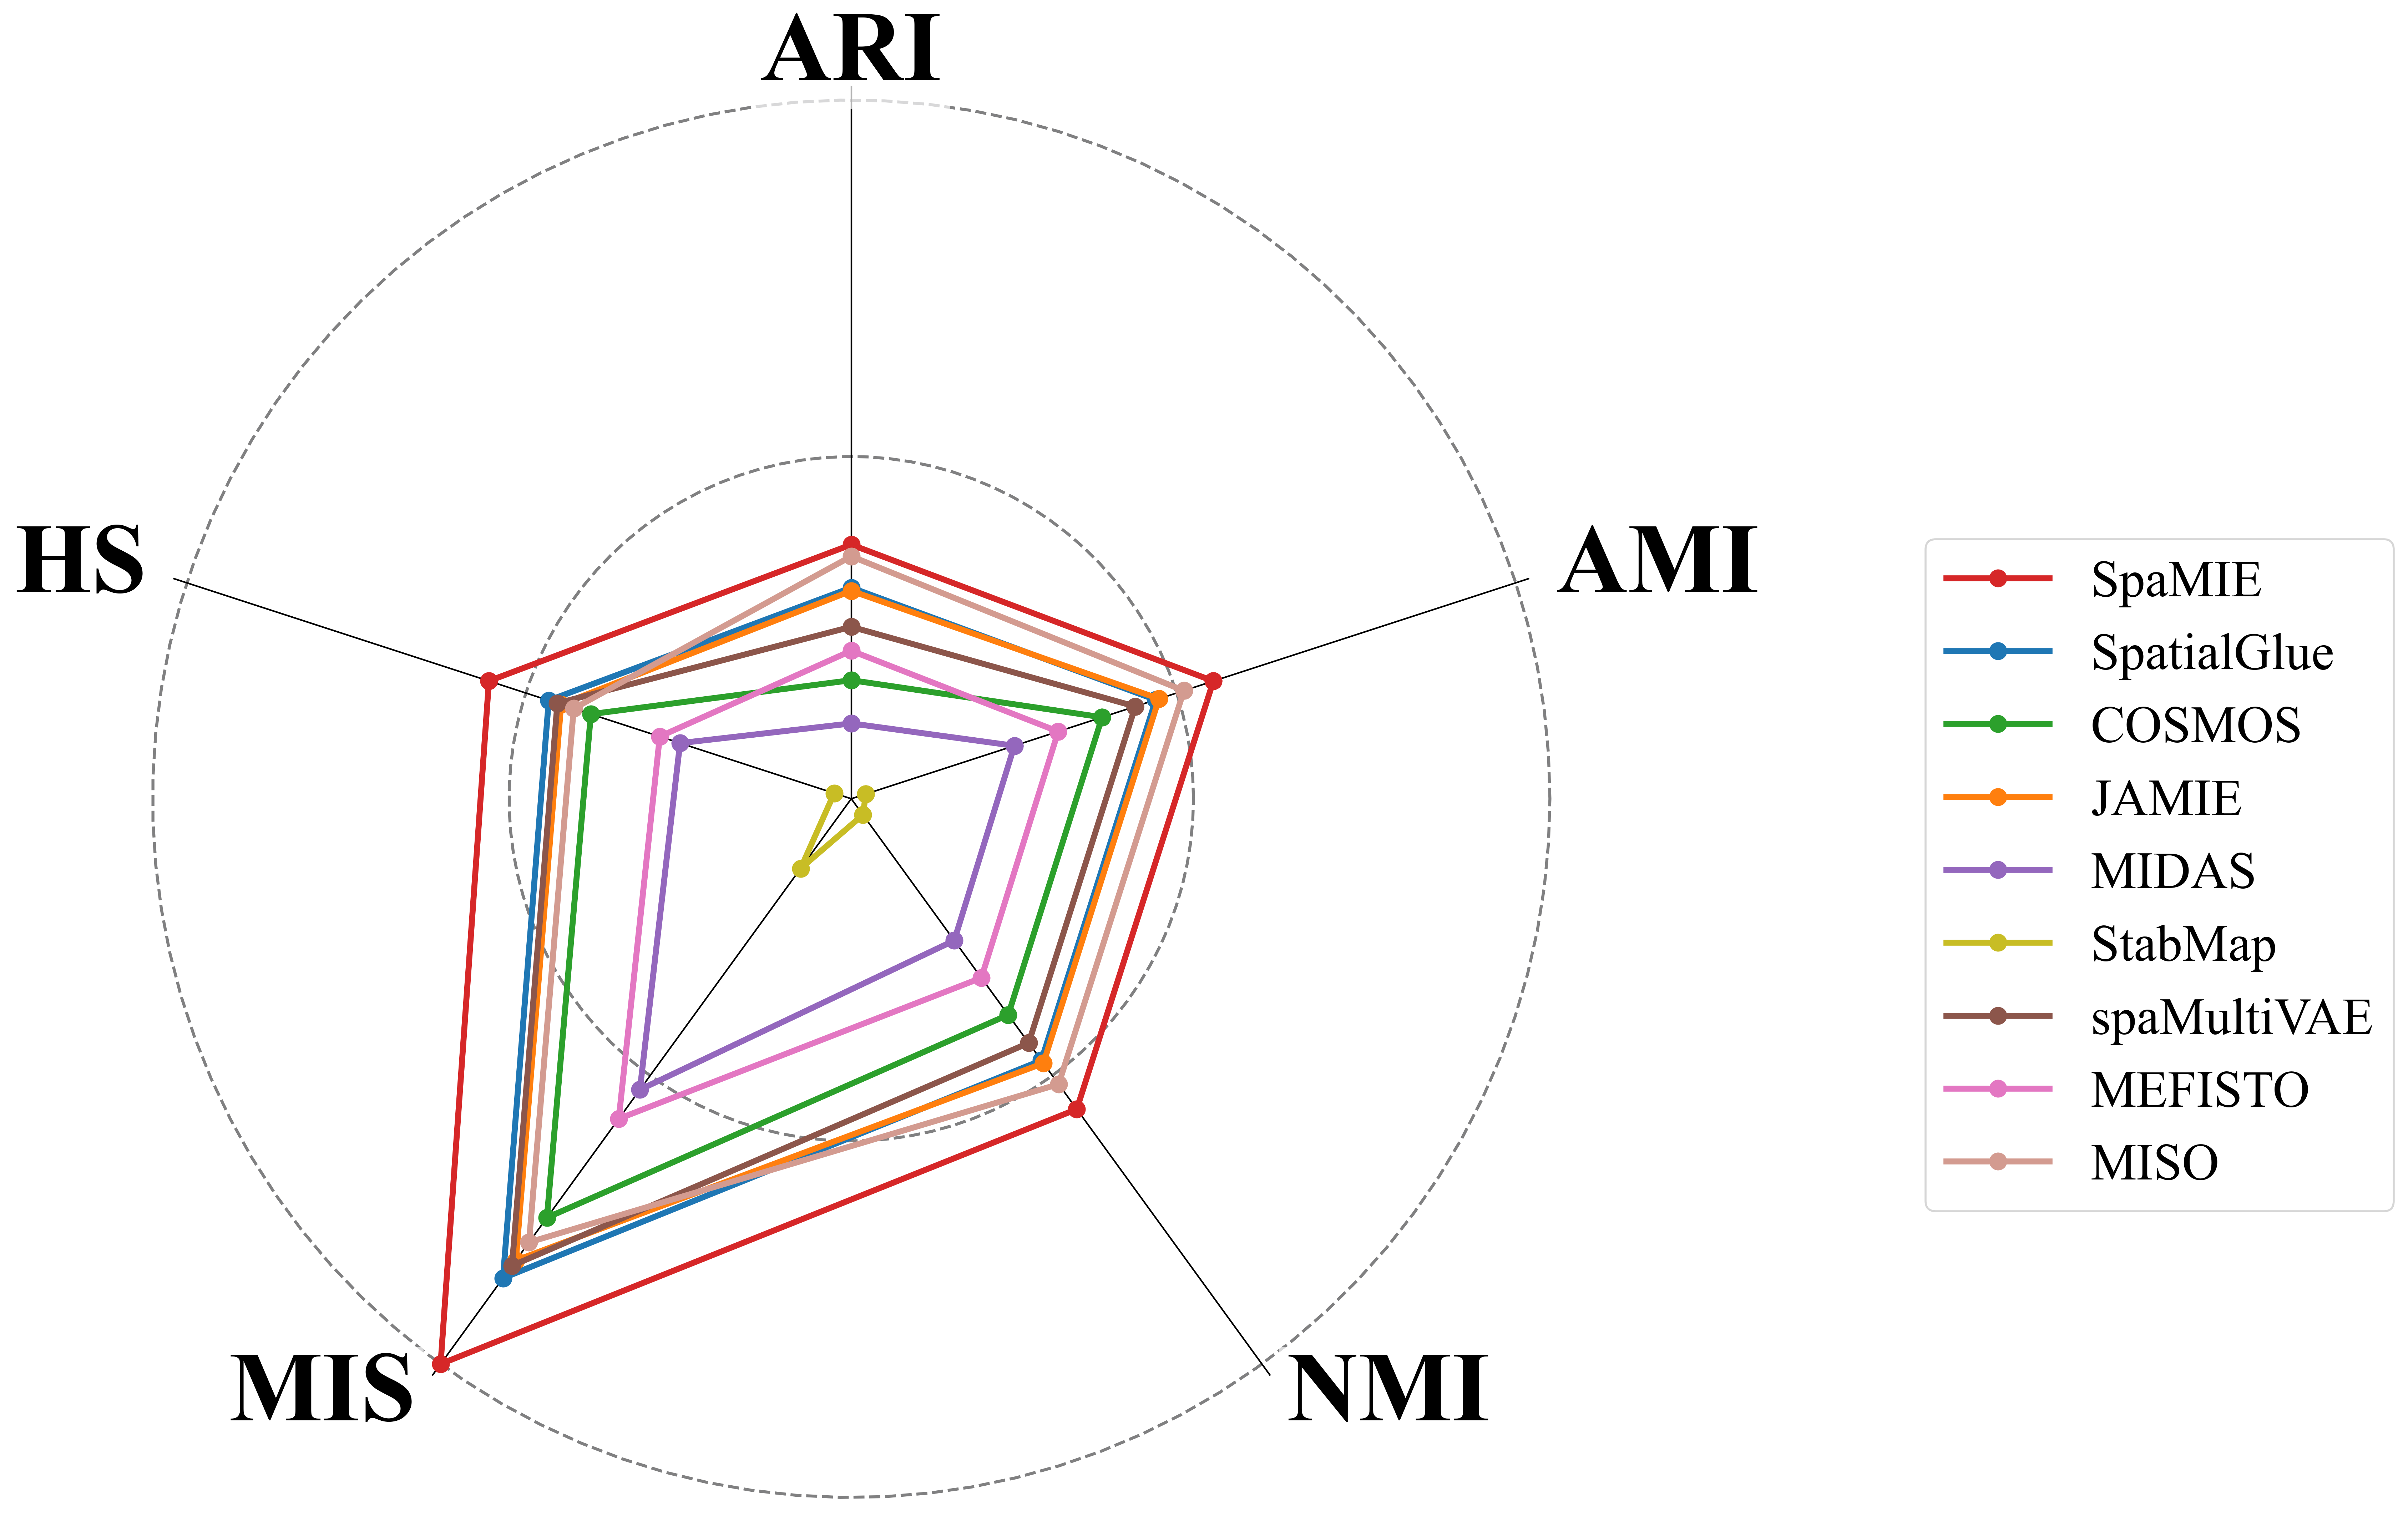

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 计算每个方法和指标的均值
mean_data = res_all_stack.groupby(['Method', 'Metric'])['value'].mean().unstack()
mean_data = mean_data[['SpaMIE', 'SpatialGlue', 'COSMOS', 'JAMIE', 'MIDAS','StabMap','spaMultiVAE', 'MEFISTO', 'MISO']]
mean_data = mean_data.T
# 获取指标列表和方法列表
metrics = mean_data.columns.tolist()
methods = mean_data.index.tolist()

# 找到ARI在指标列表中的索引位置
ari_index = metrics.index('ARI') if 'ARI' in metrics else 0

# 设置雷达图参数
num_vars = len(metrics)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# 旋转角度使ARI位于最上方 (90度位置)
offset = np.pi/2 - angles[ari_index]
angles = [(angle + offset) % (2 * np.pi) for angle in angles]

angles += angles[:1]  # 闭合图形

# 创建雷达图
fig = plt.figure(figsize=(15, 12),dpi=400)
# 增加字体大小
plt.rcParams.update({
    'font.size': 28,
    'axes.titlesize': 28,
    'axes.labelsize': 28
})
ax = fig.add_subplot(111, polar=True)

# 设置颜色
palette = ['#d62728','#1f77b4','#2ca02c','#ff7f0e','#9467bd' 
                          ,"#c8bd25" , "#8c564b", "#e377c2", "#d39b90", "#43114e"]

# 计算全局最小值和最大值用于设置范围
global_min = mean_data.min().min()
global_max = mean_data.max().max()

# 计算两个参考线的位置
ref_line1 = global_min + (global_max - global_min) * 0.5
ref_line2 = global_min + (global_max - global_min) * 1


# 添加两个虚线圆圈作为参考线
for r in [ref_line1, ref_line2]:
    circle_angles = np.linspace(0, 2 * np.pi, 100)
    circle_values = [r] * 100
    ax.plot(circle_angles, circle_values, '--', linewidth=1.5, color="#030305FF", alpha=0.5)

# 移除最外圈的实线圆圈（极坐标边界）
ax.spines['polar'].set_visible(False)

# 绘制每个方法的雷达图
for i, method in enumerate(methods):
    # 获取当前方法的所有指标值
    values = mean_data.loc[method].values.tolist()
    values += values[:1]  # 闭合图形
    
    # 绘制线条
    ax.plot(angles, values, linewidth=3, marker='o', markersize=8, 
            label=method, color=palette[i % len(palette)])
    

# 设置角度标签
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=42, fontweight='bold')
# 设置角度标签 - 关键修改：增加标签的径向位置
label_offset = 0.95 * global_max  # 增加15%的径向距离

# 设置角度刻度
ax.set_xticks(angles[:-1])

# 设置角度标签并增加径向位置
for angle, label in zip(angles[:-1], metrics):
    # 计算标签位置（径向偏移）
    x = label_offset * np.cos(angle)
    y = label_offset * np.sin(angle)
    
    # 根据角度调整水平对齐方式
    ha = 'center'
    if angle < np.pi/2 or angle > 3*np.pi/2:
        ha = 'left'
    elif angle > np.pi/2 and angle < 3*np.pi/2:
        ha = 'right'
    
    # 添加标签
    ax.text(x, y, label, 
            fontsize=50, 
            fontweight='bold',
            ha=ha, va='center',
            transform=ax.transData._b,  # 使用数据坐标
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=4))

# 隐藏默认的xticklabels
ax.set_xticklabels([])
ax.set_yticklabels([])

# 设置半径范围 - 使用实际数据范围
ax.set_ylim( global_min + 0.02 * (global_max - global_min) , 
            global_max + 0.02 * (global_max - global_min))

# 添加图例
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 0.7), fontsize=26)

# 添加标题
# plt.title('Performance Comparison by Method', size=24, pad=25, fontweight='bold')

# 美化网格 - 只保留径向虚线
ax.xaxis.grid(True, linestyle='-', color="#000000DF")

ax.yaxis.grid(False)  # 隐藏y轴网格


# 移除极坐标的圆形边界（再次确认）
ax.spines['polar'].set_visible(False)

plt.tight_layout()
plt.show()

In [32]:
import pandas as pd
path =  '/data/xiangdw/data/data/humanlymph/' 


def calculate_metrics (adata, domain, target_key):
    metrics = []
    metrics.append(ARI_metric(adata.obs[domain], adata.obs[target_key]))
    metrics.append(NMI_metric(adata.obs[domain], adata.obs[target_key]))
    metrics.append(AMI_metric(adata.obs[domain], adata.obs[target_key]))
    metrics.append(MIS_metric(adata.obs[domain], adata.obs[target_key]))
    metrics.append(HS_metric(adata.obs[domain], adata.obs[target_key]))
    return metrics

metric_all = pd.DataFrame()

for i in ('_5','_6','_7','_8','_9','_10','_11'): 
    adata1 = sc.read_h5ad(path + 'Humanlymph_cluster_methods.h5ad')
    SpaMIE_metric = {}
    SpatialGlue_metric = {}
    COSMOS_metric = {}
    SpaVAE_metric = {}
    Mefisto_metric = {}
    miso_metric = {}
    JAMIE_metric = {}
    MIDAS_metric = {}
    StabMap_metric = {}
    SpaMosaic_metric = {}




    # 对每种方法计算指标并存储在相应的字典中
    for method in ('SpaMIE_pred_1'+i,  'SpatialGlue_pred_1'+i, 'COSMOS_pred_1'+i, 'SpaVAE_1'+i, 'MEFISTO_pred_1'+i, 
                   'MISO_pred_1'+i, 'MIDAS_pred_1'+i, 'JAMIE_pred_1'+i, 'SpaMosaic_pred_1'+i,'StabMap_pred_1'+i ):
        metrics_list = calculate_metrics(adata1, 'Truth', method)
        if method == 'SpaMIE_pred_1'+i:
            SpaMIE_metric['SpaMIE'] = metrics_list
        elif method == 'SpaVAE_1'+i:
            SpaVAE_metric['spaMultiVAE'] = metrics_list
        elif method == 'COSMOS_pred_1'+i:
            COSMOS_metric['COSMOS'] = metrics_list
        elif method == 'SpatialGlue_pred_1'+i:
            SpatialGlue_metric['SpatialGlue'] = metrics_list
        elif method == 'MEFISTO_pred_1'+i:
            Mefisto_metric['MEFISTO'] = metrics_list
        elif method == 'MISO_pred_1'+i:
            miso_metric['MISO'] = metrics_list
        elif method == 'MIDAS_pred_1'+i:
            MIDAS_metric['MIDAS'] = metrics_list
        elif method == 'StabMap_pred_1'+i:
            StabMap_metric['StabMap'] = metrics_list
        elif method == 'JAMIE_pred_1'+i:
            JAMIE_metric['JAMIE'] = metrics_list
        elif method == 'SpaMosaic_pred_1'+i:
            SpaMosaic_metric['SpaMosaic'] = metrics_list                
        
        

    
    metric = {"Metric":['ARI','NMI','AMI','MIS','HS']}
    d = {}
    d = {**SpaMIE_metric, **SpatialGlue_metric, **JAMIE_metric, **miso_metric,  **SpaVAE_metric,**COSMOS_metric,
         **MIDAS_metric, **Mefisto_metric,**StabMap_metric, } 
    d =pd.DataFrame(d,index=['ARI','NMI','AMI','MIS','HS'])
    metric_all = pd.concat([metric_all, d], axis=0)

metric_all


import pandas as pd

res_all_stack = metric_all.stack().reset_index()
res_all_stack.columns=['Method', 'Metric', 'value']
res_all_stack.set_index('Method')

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,4)
plt.rcParams['font.size'] = 20
plt.rcParams['font.sans-serif'] = 'Arial'
res_all_stack


/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names 

Method       Metric     value
0      ARI       SpaMIE  0.255320
1      ARI  SpatialGlue  0.231463
2      ARI        JAMIE  0.230538
3      ARI         MISO  0.286848
4      ARI  spaMultiVAE  0.198208
..     ...          ...       ...
310     HS  spaMultiVAE  0.413391
311     HS       COSMOS  0.361620
312     HS        MIDAS  0.295061
313     HS      MEFISTO  0.248420
314     HS      StabMap  0.070127

[315 rows x 3 columns]

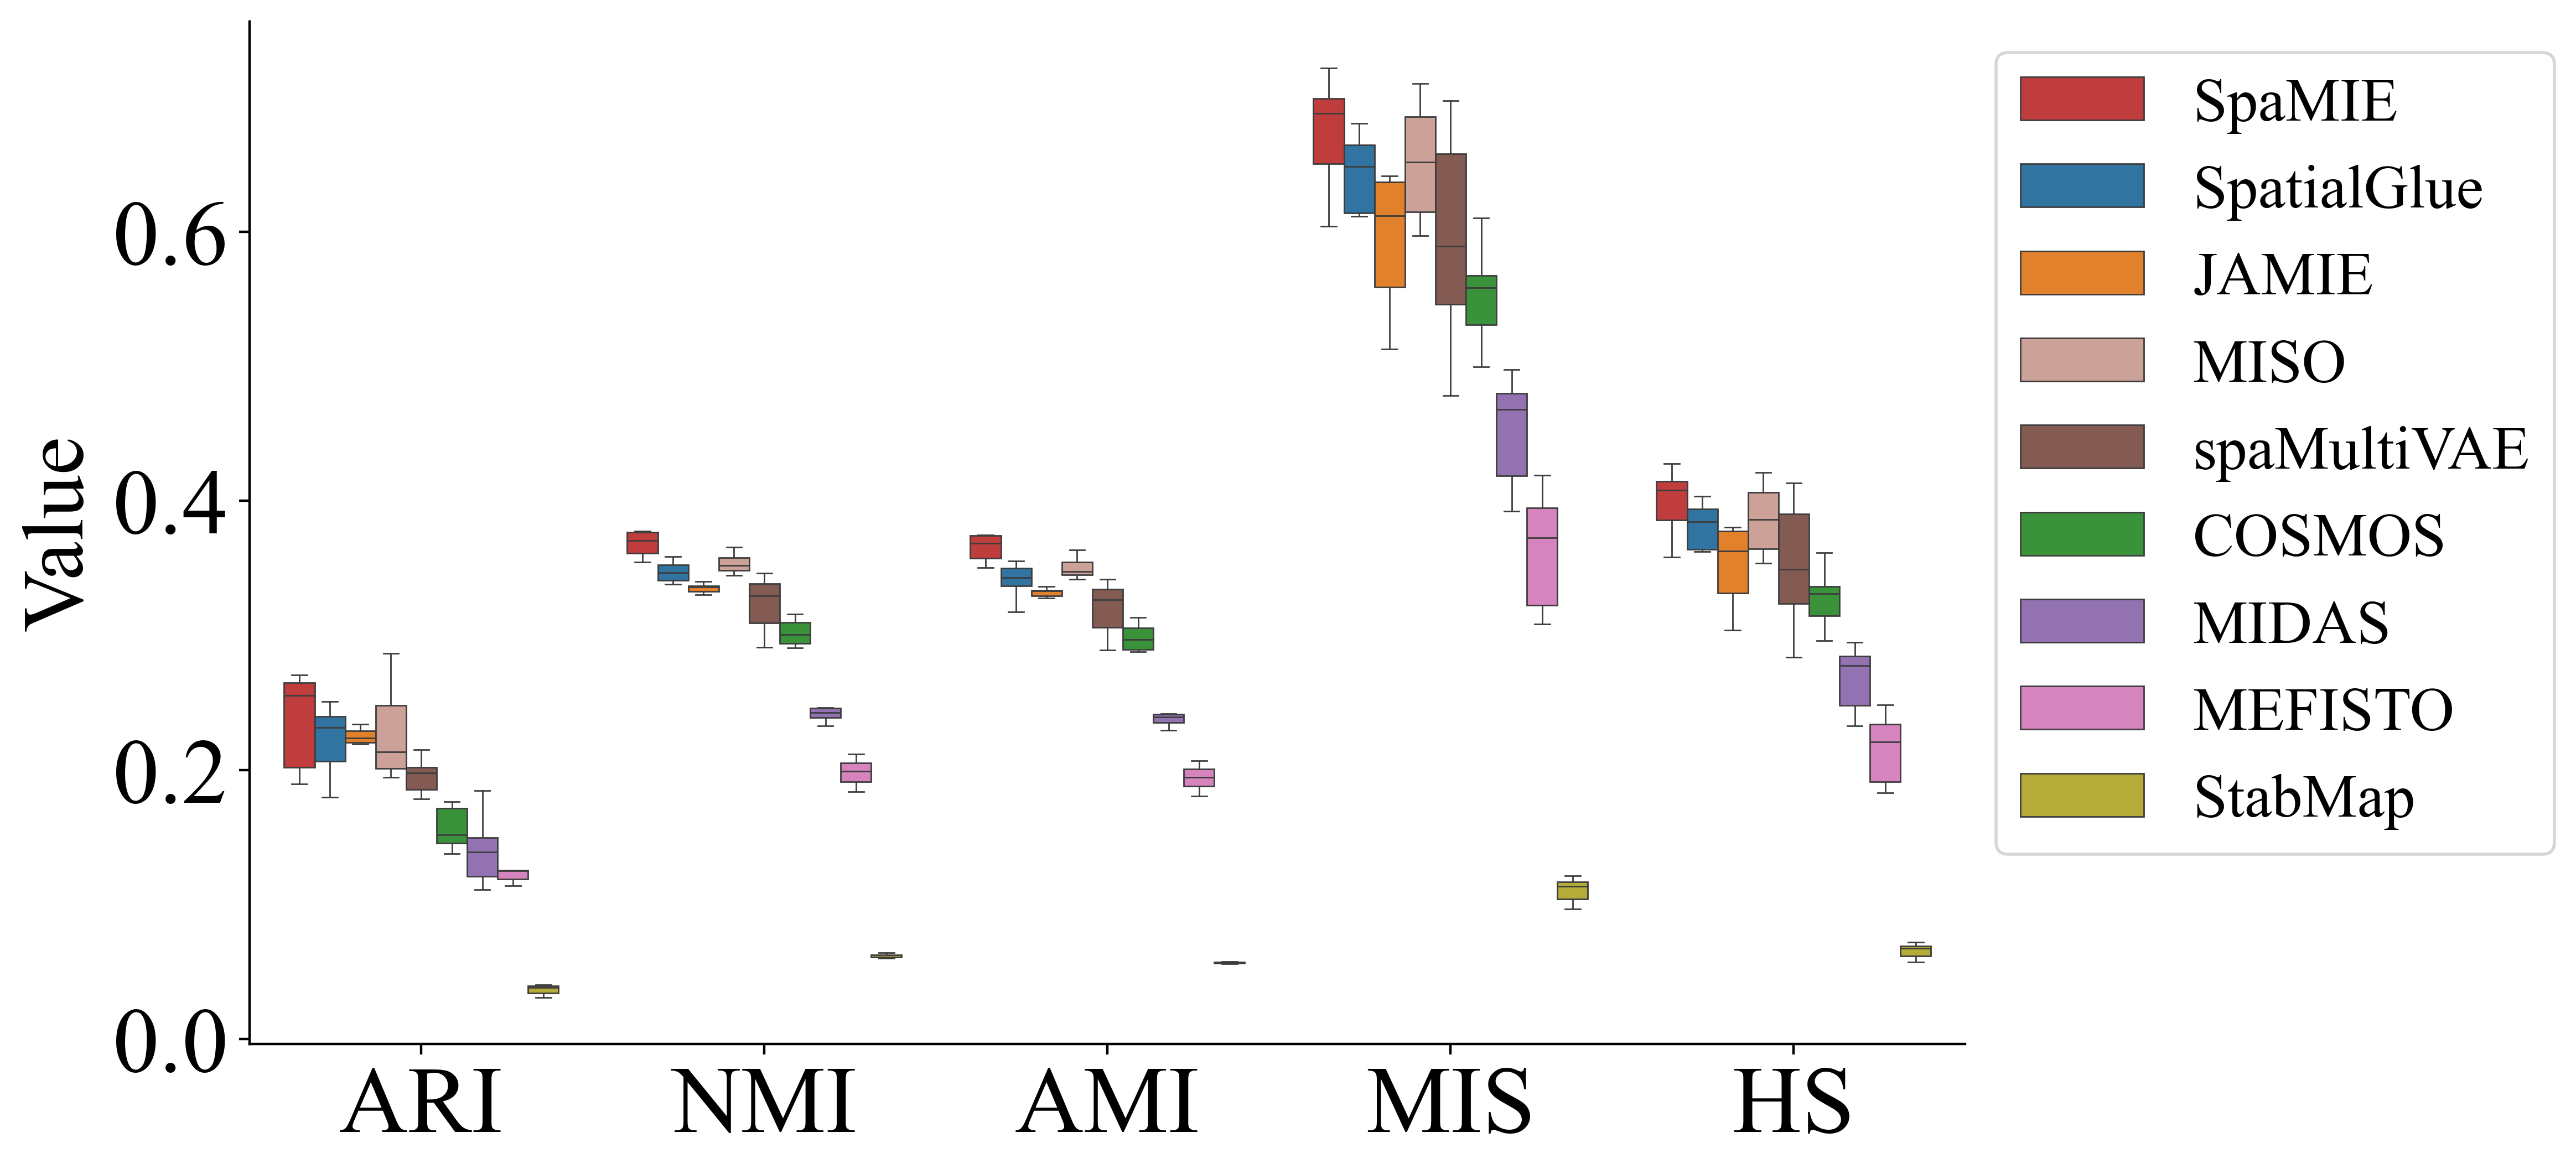

In [33]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 6),dpi=400)
plt.rcParams.update({
    'font.size': 40,           # 增大全局字体
    'axes.titlesize': 30,      # 坐标轴标题大小
    'axes.labelsize': 30,      # 坐标轴标签大小
    'xtick.labelsize': 30,     # X轴刻度标签大小
    'ytick.labelsize': 30,     # Y轴刻度标签大小
    'legend.fontsize': 35      # 图例字体大小
})
ax = sns.boxplot(data=res_all_stack, x='Method', y='value', hue='Metric', linewidth=0.5, showfliers=False,
                 palette=['#d62728','#1f77b4','#ff7f0e',"#d39b90","#8c564b",'#2ca02c','#9467bd' 
                          , "#e377c2", "#c8bd25" , ])


ax.set_xlabel('')
ax.set_ylabel('Value')
ax.set_title('')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=20)
ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/data/xiangdw/conda_env/GNNS/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'

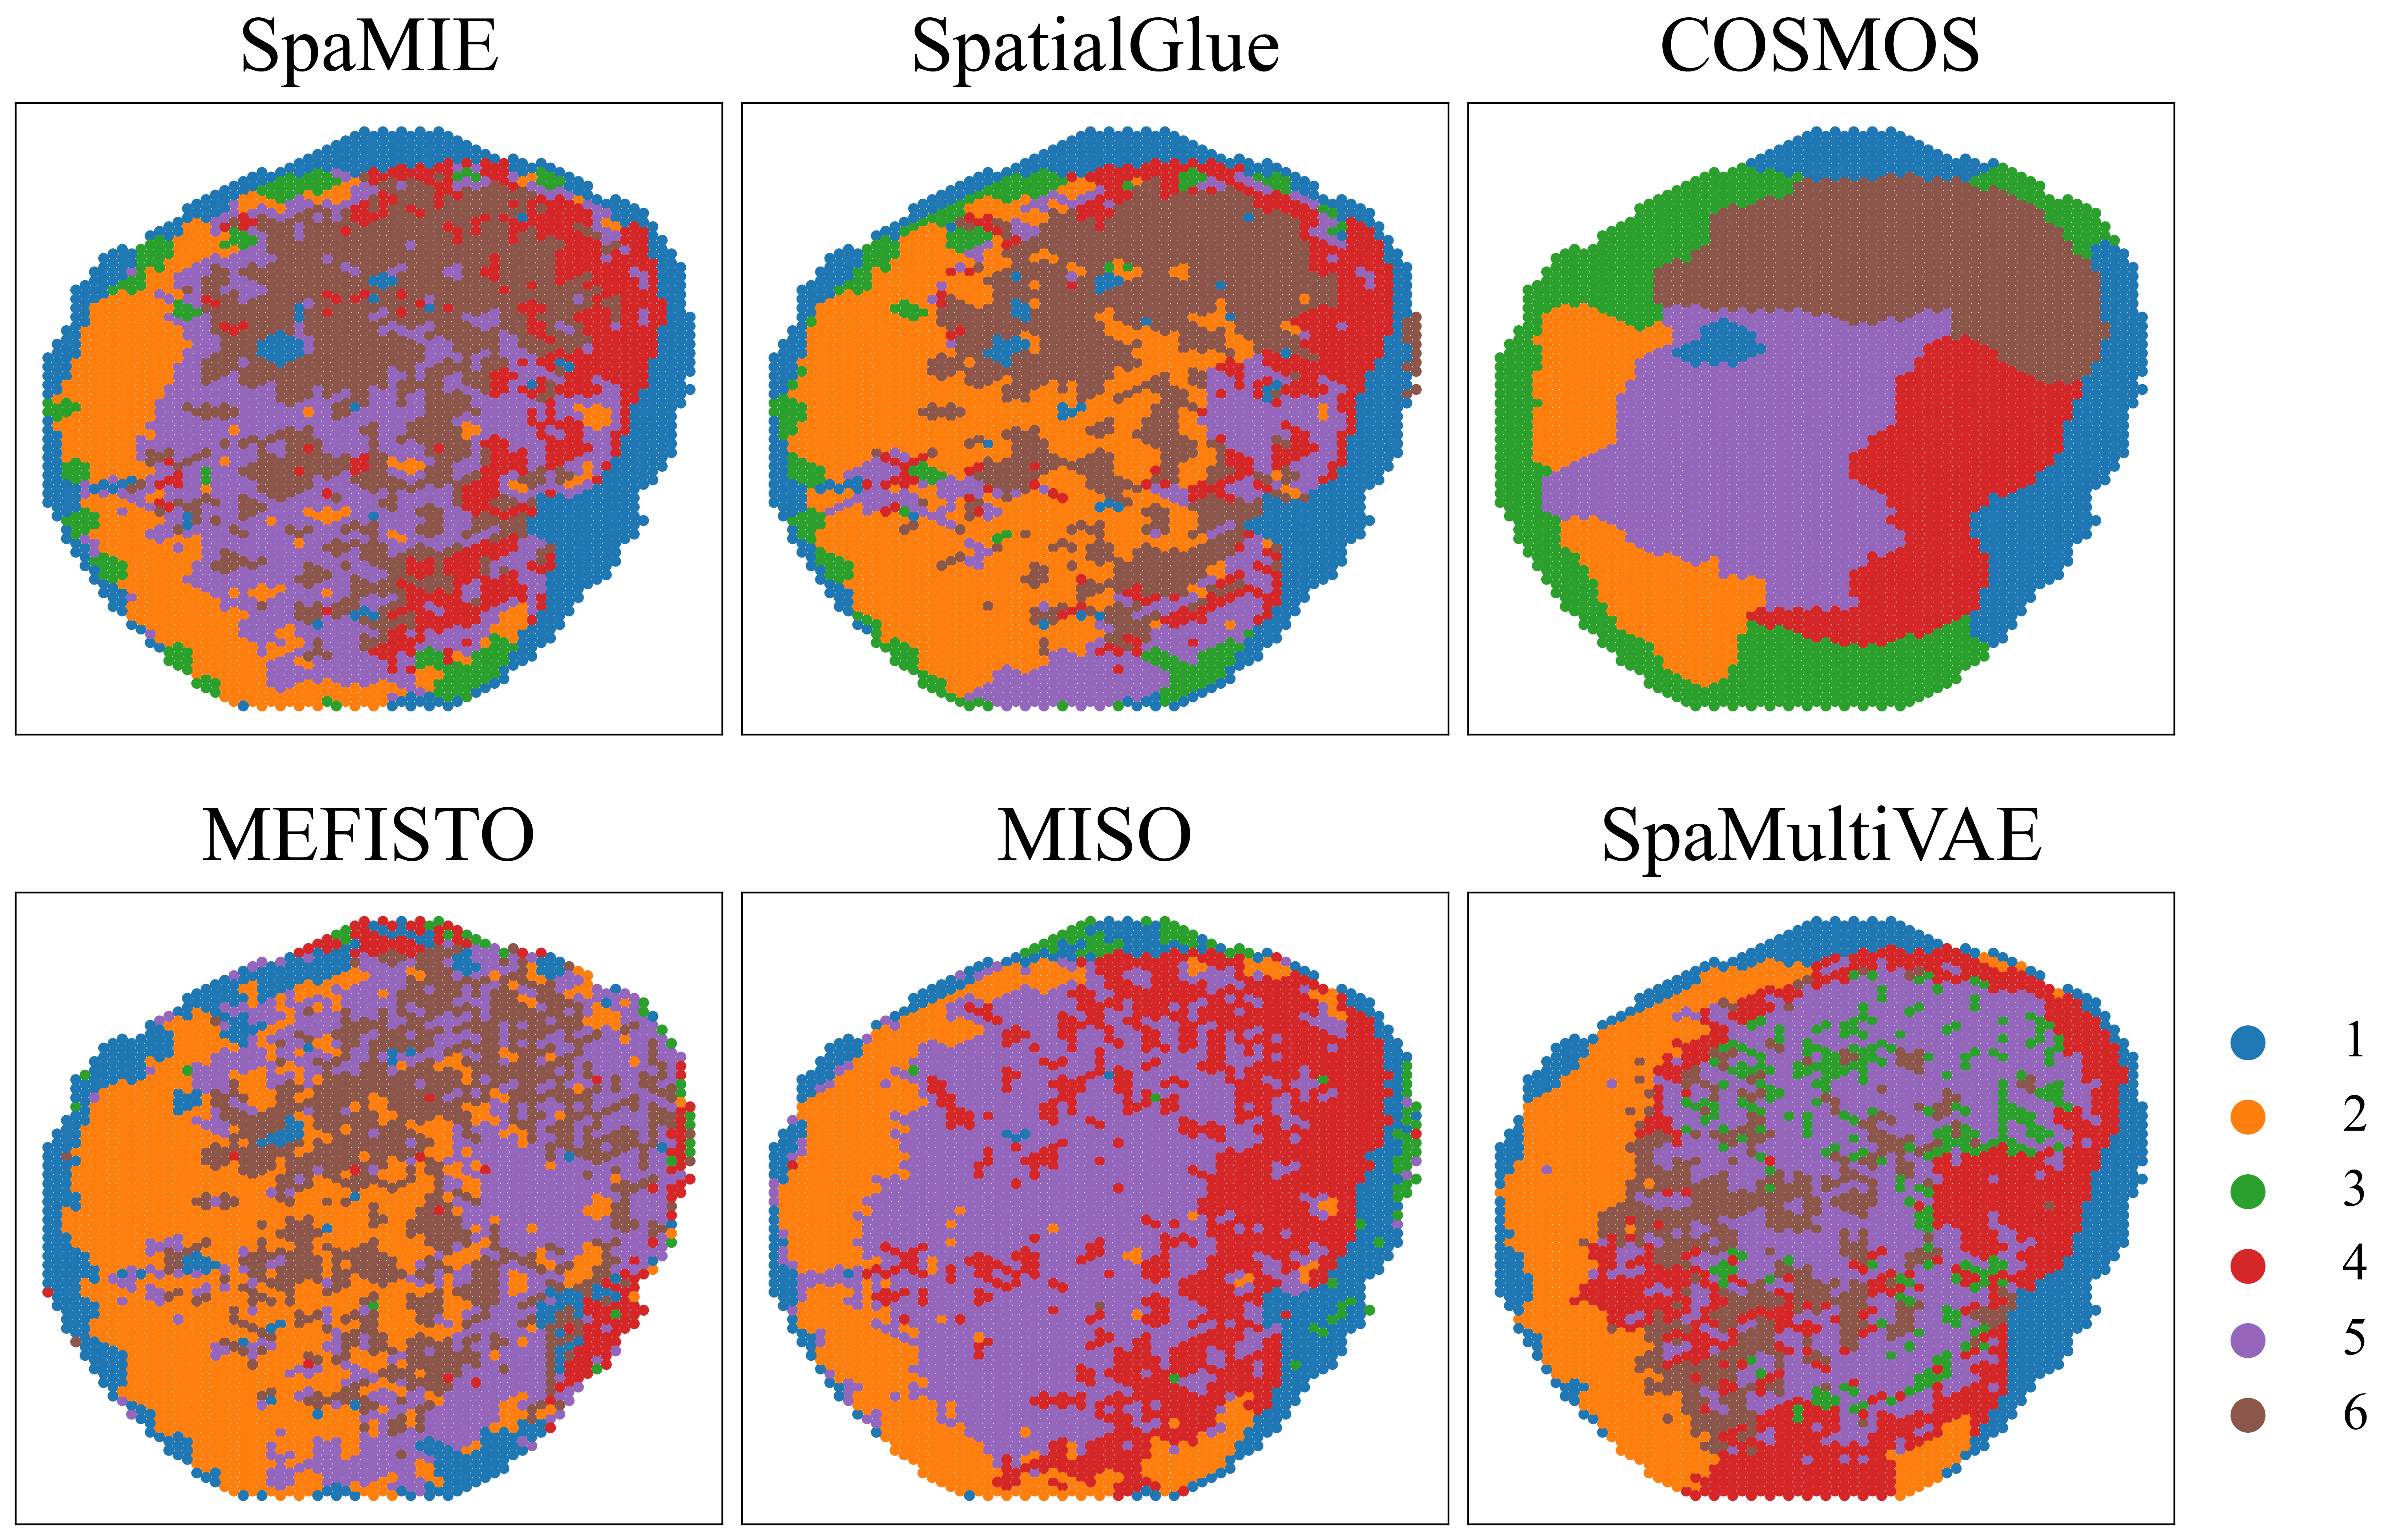

In [34]:
key_name = 'SpaMIE'
import matplotlib.pyplot as plt
fig, ax_list = plt.subplots(2, 3, figsize=(16, 10.5),dpi=400)
plt.rcParams.update({
    'font.size': 30,           # 增大全局字体
    'axes.titlesize': 36,      # 坐标轴标题大小
    'axes.labelsize': 36,      # 坐标轴标签大小
    'xtick.labelsize': 31,     # X轴刻度标签大小
    'ytick.labelsize': 30,     # Y轴刻度标签大小
    'legend.fontsize': 16      # 图例字体大小
})
path = '/data/xiangdw/data/data/humanlymph/'
adata_omics2 = sc.read_h5ad(path+'Humanlymph_methods.h5ad')

adata_omics2.obs['SpaMIE_pred_1'] = (adata_omics2.obs['SpaMIE_pred_1'].astype(int) + 1).astype('category')
SpaMIE_pred_1 = np.array(adata_omics2.obs['SpaMIE_pred_1'], dtype=int).tolist()
swap_dict = {1: 6, 2: 5, 3: 2, 4: 1, 5: 4, 6: 3}
SpaMIE_pred_1 = [swap_dict[category] for category in SpaMIE_pred_1]
adata_omics2.obs['SpaMIE_pred_1'] = pd.Categorical(SpaMIE_pred_1)

adata_omics2.obs['SpatialGlue_pred_1'] = (adata_omics2.obs['SpatialGlue_pred_1'].astype(int) + 1).astype('category')
SpatialGlue_pred_1 = np.array(adata_omics2.obs['SpatialGlue_pred_1'], dtype=int).tolist()
swap_dict = {1: 2, 2: 6, 3: 1, 4: 5, 5: 4, 6:3}
SpatialGlue_pred_1 = [swap_dict[category] for category in SpatialGlue_pred_1]
adata_omics2.obs['SpatialGlue_pred_1'] = pd.Categorical(SpatialGlue_pred_1)

adata_omics2.obs['COSMOS_pred_1'] = (adata_omics2.obs['COSMOS_pred_1'].astype(int) + 1).astype('category')
COSMOS_pred_1 = np.array(adata_omics2.obs['COSMOS_pred_1'], dtype=int).tolist()
swap_dict = {1: 5, 2: 6, 3: 3, 4: 4, 5: 1, 6:2}
COSMOS_pred_1 = [swap_dict[category] for category in COSMOS_pred_1]
adata_omics2.obs['COSMOS_pred_1'] = pd.Categorical(COSMOS_pred_1)

adata_omics2.obs['SpaVAE_pred_1'] = (adata_omics2.obs['SpaVAE_pred_1'].astype(int) + 1).astype('category')
spaMutiVAE = np.array(adata_omics2.obs['SpaVAE_pred_1'], dtype=int).tolist()
swap_dict = {1: 5, 2: 4, 3: 2, 4: 6, 5:1, 6:3} 
spaMutiVAE = [swap_dict[category] for category in spaMutiVAE]
adata_omics2.obs['SpaVAE_pred_1'] = pd.Categorical(spaMutiVAE)

adata_omics2.obs['MEFISTO_pred_1'] = (adata_omics2.obs['MEFISTO_pred_1'].astype(int) + 1).astype('category')
MEFISTO_pred_1 = np.array(adata_omics2.obs['MEFISTO_pred_1'], dtype=int).tolist()
swap_dict = {1: 2, 2: 5, 3: 1, 4: 6, 5: 4, 6:3}
MEFISTO_pred_1= [swap_dict[category] for category in MEFISTO_pred_1]
adata_omics2.obs['MEFISTO_pred_1'] = pd.Categorical(MEFISTO_pred_1)

adata_omics2.obs['MISO_pred_1'] = (adata_omics2.obs['MISO_pred_1'].astype(int) + 1).astype('category')
MISO_pred_1 = np.array(adata_omics2.obs['MISO_pred_1'], dtype=int).tolist()
swap_dict = {1: 4, 2: 2, 3: 5, 4: 3, 5:1, 6:6} 
MISO_pred_1= [swap_dict[category] for category in MISO_pred_1]
adata_omics2.obs['MISO_pred_1'] = pd.Categorical(MISO_pred_1)

sc.pl.embedding(adata_omics2, basis='spatial', color=['SpaMIE_pred_1'], ax=ax_list[0,0], title='SpaMIE', s=100, show=False)
sc.pl.embedding(adata_omics2, basis='spatial', color=['SpatialGlue_pred_1'], ax=ax_list[0,1], title='SpatialGlue', s=100, show=False)
sc.pl.embedding(adata_omics2, basis='spatial', color=['COSMOS_pred_1'], ax=ax_list[0,2], title='COSMOS', s=100, show=False)
sc.pl.embedding(adata_omics2, basis='spatial', color=['MEFISTO_pred_1'], ax=ax_list[1,0], title='MEFISTO', s=100, show=False)
sc.pl.embedding(adata_omics2, basis='spatial', color=['MISO_pred_1'], ax=ax_list[1,1], title='MISO', s=100, show=False)
sc.pl.embedding(adata_omics2, basis='spatial', color=['SpaVAE_pred_1'], ax=ax_list[1,2], title='SpaMultiVAE', s=100, show=False)

ax_list[0,0].set_title('SpaMIE', pad=15)
ax_list[0,1].set_title('SpatialGlue', pad=15)
ax_list[0,2].set_title('COSMOS', pad=15)
ax_list[1,0].set_title('MEFISTO', pad=15)
ax_list[1,1].set_title('MISO', pad=15)
ax_list[1,2].set_title('SpaMultiVAE', pad=15)

handles, labels = ax_list[0,0].get_legend_handles_labels()
if len(handles) > 0:
    legend = ax_list[1,2].legend(
        handles, 
        labels, 
        markerscale=2.5,  # 符号放大2倍（默认s=100 → 实际显示100）
        fontsize=24,
        frameon=False,
        bbox_to_anchor=(1.0, 0.1), loc=3, borderaxespad=0

    )

ax_list[0,0].set_xlabel('')
ax_list[0,0].set_ylabel('')
ax_list[0,1].set_xlabel('')
ax_list[0,1].set_ylabel('')
ax_list[0,2].set_xlabel('')
ax_list[0,2].set_ylabel('')
ax_list[1,0].set_xlabel('')
ax_list[1,0].set_ylabel('')
ax_list[1,1].set_xlabel('')
ax_list[1,1].set_ylabel('')
ax_list[1,2].set_xlabel('')
ax_list[1,2].set_ylabel('')
ax_list[0,0].get_legend().remove()
ax_list[0,1].get_legend().remove()
ax_list[0,2].get_legend().remove()
ax_list[1,0].get_legend().remove()
ax_list[1,1].get_legend().remove()
plt.tight_layout(w_pad=0.3)
plt.show()